In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Data/news_data.csv')

In [6]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
data.shape

(6335, 4)

In [13]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [14]:
labels = data.label

In [15]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

#### Building model

In [19]:
## Splitting data set

In [21]:
X_train, X_test, y_train, y_test= train_test_split(data["text"], labels, test_size= 0.2, random_state= 5)

In [22]:
# TfidfVectorizer for English stop words

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [24]:
tf_train = vectorizer.fit_transform(X_train)
tf_test = vectorizer.transform(X_test)

In [25]:
## PassiveAggressiveClassifier

In [26]:
passive = PassiveAggressiveClassifier(max_iter = 70)

In [27]:
passive.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=70)

In [28]:
predict_y = passive.predict(tf_test)

### Model accuvarcy

In [29]:
## Confusion matrix

In [30]:
con_matrix = confusion_matrix(y_test, predict_y, labels=['FAKE', 'REAL'])

In [31]:
con_matrix

array([[603,  34],
       [ 34, 596]], dtype=int64)

In [32]:
#Visualization

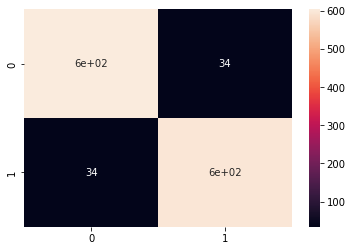

In [37]:
sns.heatmap(con_matrix, annot=True)
plt.show()

In [38]:
### Model's accuracy

In [39]:
accuracy = accuracy_score(y_test, predict_y)

In [41]:
print("Model's accuracy: %", accuracy*100)

Model's accuracy: % 94.63299131807419


### Reporting

In [42]:
report = classification_report(y_test, predict_y)

In [43]:
print(report)

              precision    recall  f1-score   support

        FAKE       0.95      0.95      0.95       637
        REAL       0.95      0.95      0.95       630

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267

